# <font><b>第二章 感知机(Perceptron)</b></font>

1、感知机(perceptron)是二类分类的线性分类模型，其输入为实例的特征向量，输出为实例的类别，取+1和-1值。感知机对应输入空间(特征向量)中将实例划分为正负两类的分离超平面。

2、属于判别模型，旨在求出将训练数据进行划分的分离超平面

3、**感知机模型**：$f(x)=sign(w\bullet x+b)$ ；其中，$w$和$b$为感知机模型的参数，$sign$是符号函数，即
$$sign(x)=\left\{
\begin{aligned}
+1,&     &x\geq 0\\
-1,&     &x < 0
\end{aligned}
\right.
$$
4、**感知机的学习策略**：即定义(经验)损失函数并将损失函数最小化。

* 定义(数据集的线性可分性) 如果存在某个超平面$S:$ $$w\cdot x +b =0$$ 能够将数据集的正实例点和负实例点完全正确的划分到超平面的两侧，那么，
$$\left\{
\begin{aligned}
对于所有y_i = +1的实例&  & \Rightarrow &  & w\cdot x +b >0 \\
对于所有y_i = -1的实例&  & \Rightarrow &  & w\cdot x +b <0 \\
\end{aligned}
\right.
$$ 则称该数据集为线性可分，否则不可分.

* 对于误分类的数据来说，$-y_i(w\cdot x +b)>0$ 成立: 
$$ \Rightarrow \left\{\begin{aligned} 误分为负类(-1)的数据:y_i=+1, (w\cdot x +b)<0 &  & \Rightarrow &  &-y_i(w\cdot x +b)>0 \\误分为正类(+1)的数据:y_i=-1, (w\cdot x +b)>0 &  & \Rightarrow &  &-y_i(w\cdot x +b)>0 \end{aligned}\right.$$

* 假设超平面S的误分类点集合为$M$，那么所有误分类点到超平面$S$的总距离为$$-\frac{1}{||w||}\sum_{x_i\in M}y_i(w\cdot x_i +b)$$,不考虑$\frac{1}{||w||}$,就得感知机的损失函数。
* 感知机$sign(w\cdot x +b)$的损失函数：$$L(w,b)= - \sum_{x_i\in M}y_i(w\cdot x_i +b)$$其中，$M$为误分类点集合


4、**感知机算法**：求参数$w,b$的值，使损失函数极小化：$$\mathop {min} \limits_{w,b}L(w,b)=- \sum_{x_i\in M}y_i(w\cdot x_i +b)$$
* 随机梯度下降法(stochastic gradient descent)，随机抽取一个误分类点使其梯度下降。

    $w = w+\eta y_ix_i$

    $b = b+\eta yi$
    
* <font> <b>算法(感知机学习算法原始形式):</b></font>

    输入：训练数据集 $T=\{(x_i,y_i)\},y_\in\{-1,+1\}, i=1,2,\cdots,N,学习率(步长)\eta(0<\eta \leq 1).$
    
    输出：$w,b$,感知机模型$f(x) = sign(w\cdot x+b)$
    
    1）：选取初始$w_0,b_0$
    
    2）：在训练集中选择数据 $(x_i,y_i)$
    
    3）：如果$y_i(w\cdot x +b)\leq 0$
    
     $w\leftarrow w + \eta y_i x_i$
    
     $b\leftarrow b + \eta y_i$
    
    4）：返回 2），直至没有误分类点
    
* <font> <b>算法收敛性:</b></font> 

    误分类次数 $k\leq (\frac{R}{\gamma})^2$ .其中，$R=\mathop {max} \limits_{1\leq i\leq N}||\mathop x_i\limits^{\wedge}||$
    
    当训练集可分时，感知机原始算法是收敛的，存在多个解，这些解依赖于初值的选择。当训练集不可解时，感知机学习算法不收敛，迭代结果会发生震荡。
    


<font size=5><b> Perceptron </b></font>

In [7]:
# 1.定义Perceptron类 包含 1）init(初始化w,b值) ；2）定义超平面(wx+b)函数 ；3）随机梯度下降
import numpy as np 
class Perceptron_model:
    def __init__(self):
        # 初始化 w=1,b=0，学习率 l_rate = 1
        self.w = np.ones(len(data[0])-1,dtype=np.float32)
        self.b = 0
        self.l_rate = 1
        
    ## 定义函数 ： w*x +b 
    def sign(self,x,w,b):
        y = np.dot(x,w) +b 
        return y 
    
    def fitting(self,X_train,Y_train):
        
        is_wrong = True ## 判断标志，判断是否有误分类点
        
        while is_wrong: ##如果训练集中有误分类点：
            
            wrong_count=0   ##误分类计数器
            for i in range(len(X_train)): ##随机选取训练集
                x=X_train[i]
                y=Y_train[i]
                if y*self.sign(x,self.w,self.b)<=0: ## 如果该数据被误分类 
                    self.w = self.w + self.l_rate * np.dot(y,x) 
                    self.b = self.b + self.l_rate * y
                    wrong_count +=1 #误分类计数器加1
            if wrong_count==0:
                is_wrong = False ## 当误分类计数器为0的时候，停止循环 
        return "Perceptron Model"
    

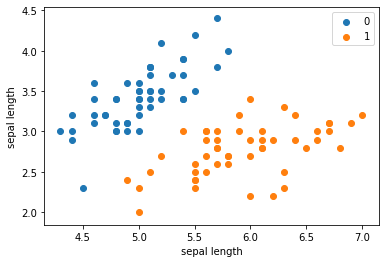

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
%matplotlib inline

# 加载数据
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df["label"] = iris.target

# 重新定义列名
df.columns = ["sepal length","sepal width","petal length","petal width","label"]

# df.label.value_counts()
# df["label"].value_counts()

# 画图
plt.scatter(df[:50]["sepal length"],df[:50]["sepal width"],label="0")
plt.scatter(df[50:100]["sepal length"],df[50:100]["sepal width"],label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal length")
plt.legend()



In [21]:
# 定义输入数据集 取第0，1，及最后一列，前100条数据
data = np.array(df.iloc[:100,[0,1,-1]])

X=data[:,:-1]
y=data[:,-1]

y=np.array([1 if j==1 else -1 for j in y])
## 使用感知机型
perceptron = Perceptron_model()
perceptron.fitting(X,y)

w = perceptron.w
b = perceptron.b 

 * <font><b>分离超平面</b></font>
$$w\cdot x +b =0 \Rightarrow \left\{
\begin{aligned}
\Rightarrow &  &(w[0],w[1])\cdot (x_i,y_i)^T + b =0    &\\
\Rightarrow &  & w[0]\cdot x_i +w[1]\cdot y_i + b =0   &\\
\Rightarrow &  & y_i = -\frac{ w[0]\cdot x_i + b}{w[1]}&\\
\end{aligned}
\right.
$$

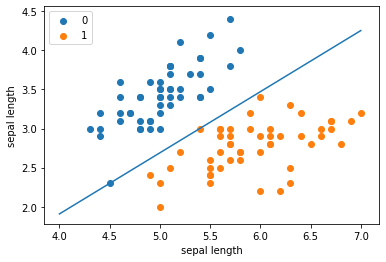

In [26]:
# 画图

x_point = np.linspace(4,7,10)
y_point = -(x_point * w[0] + b)/w[1]

plt.plot(x_point,y_point)

plt.scatter(df[:50]["sepal length"],df[:50]["sepal width"],label="0")
plt.scatter(df[50:100]["sepal length"],df[50:100]["sepal width"],label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal length")
plt.legend()

### sklearn实现

In [33]:
from sklearn.linear_model import Perceptron

sk_perceptron = Perceptron()
sk_perceptron.fit(X,y)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
sk_w = sk_perceptron.coef_
sk_w = sk_w[0]
sk_b = sk_perceptron.intercept_
sk_b

array([-5.])

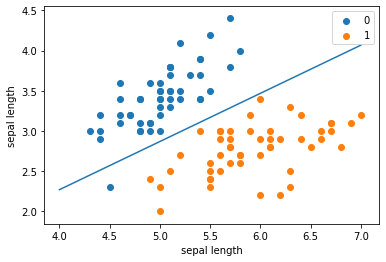

In [44]:
# 画图

x_point = np.linspace(4,7,10)
y_point = -(x_point * sk_w[0] + sk_b)/sk_w[1]

plt.plot(x_point,y_point)

plt.scatter(df[:50]["sepal length"],df[:50]["sepal width"],label="0")
plt.scatter(df[50:100]["sepal length"],df[50:100]["sepal width"],label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal length")
plt.legend()